# Data Understanding

In [2]:
from google.colab import files
files.upload()
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
! kaggle datasets download -d uttam94/recommendation

  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 101MB/s]


In [4]:
!unzip /content/recommendation.zip

Archive:  /content/recommendation.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [5]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
print('Jumlah data movies: ', len(movies.movieId.unique()))
print('Jumlah data ratings: ', len(ratings.movieId.unique()))

Jumlah data movies:  9742
Jumlah data ratings:  9724


# Univariate Exploratory Data Analysis

## Movie Variable

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

## Ratings Variable

In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
print('Banyak movie dalam ratings :', len(ratings.movieId.unique()))
print('Banyak user dalam ratings :', len(ratings.userId.unique()))

Banyak movie dalam ratings : 9724
Banyak user dalam ratings : 610


In [ ]:
# fitur timestamp akan di-drop karena tidak diperlukan

# Data Preprocessing

## Mengetahui jumlah rating

In [14]:
all_movies = pd.merge(ratings, movies, on='movieId', how='left')
all_movies

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [15]:
all_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [16]:
all_movies.groupby('movieId').sum()

<ipython-input-16-8a1c61d34b08>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_movies.groupby('movieId').sum()


,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


# Data Preparation

## mengatasi missing value

In [17]:
all_movies.shape

(100836, 6)

In [18]:
all_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

## Drop fitur yang tidak digunakan

In [19]:
ratings = ratings.drop(columns=['timestamp'])
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## Pisahkan movie yang tidak ada genre

In [20]:
import numpy as np
import itertools

genre_list = movies.genres.str.split("|").tolist()
genre = list(set(itertools.chain(*genre_list)))
genre

['Sci-Fi',
 'Fantasy',
 'Western',
 'Musical',
 'War',
 '(no genres listed)',
 'Adventure',
 'Animation',
 'Comedy',
 'Film-Noir',
 'Children',
 'Romance',
 'IMAX',
 'Mystery',
 'Documentary',
 'Action',
 'Drama',
 'Thriller',
 'Horror',
 'Crime']

dari genre diatas, terdapat movie yang tidak ada genre. maka movie yang tidak ada genre akan dihapus.

In [21]:
movies[movies['genres'] == '(no genres listed)']

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [22]:
fix_movies = movies.drop(movies[movies['genres'] == '(no genres listed)'].index)
print("jumlah movie tidak ada genre : ", len(fix_movies[fix_movies['genres'] == '(no genres listed)']))

jumlah movie tidak ada genre :  0


In [23]:
genre_list = fix_movies.genres.str.split("|").tolist()
genre = list(set(itertools.chain(*genre_list)))
genre

['Sci-Fi',
 'Fantasy',
 'Western',
 'Musical',
 'War',
 'Adventure',
 'Animation',
 'Comedy',
 'Film-Noir',
 'Children',
 'Romance',
 'IMAX',
 'Mystery',
 'Documentary',
 'Action',
 'Drama',
 'Thriller',
 'Horror',
 'Crime']

# Model Development dengan Content Based Filtering

## TF-IDF Vectorizer

In [24]:
data = fix_movies.copy()
data.sample(5)

,movieId,title,genres
5268,8656,"Short Film About Killing, A (Krótki film o zab...",Crime|Drama
5740,30818,Beyond the Sea (2004),Drama|Musical
8473,112804,I Origins (2014),Drama|Sci-Fi
30,31,Dangerous Minds (1995),Drama
5988,36537,Thumbsucker (2005),Comedy|Drama


In [25]:
genre

['Sci-Fi',
 'Fantasy',
 'Western',
 'Musical',
 'War',
 'Adventure',
 'Animation',
 'Comedy',
 'Film-Noir',
 'Children',
 'Romance',
 'IMAX',
 'Mystery',
 'Documentary',
 'Action',
 'Drama',
 'Thriller',
 'Horror',
 'Crime']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(token_pattern=r"(?u)\b\w[\w-]*\w\b")

# Melakukan perhitungan idf pada data cuisine
tf.fit(fix_movies['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war',
       'western'], dtype=object)

In [27]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(fix_movies['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9708, 19)

In [28]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.4168036 , 0.51628768, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51229321, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5784593 , 0.        , 0.81571125, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [29]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=fix_movies.title
).sample(10, axis=1).sample(10, axis=0)

,animation,adventure,romance,children,comedy,mystery,film-noir,thriller,crime,documentary
title,,,,,,,,,,
Music From Another Room (1998),0.0,0.000000,0.841594,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Secret Admirer (1985),0.0,0.000000,0.821155,0.0,0.570705,0.0,0.0,0.000000,0.0,0.0
War and Peace (2016),0.0,0.000000,0.841594,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Varsity Blues (1999),0.0,0.000000,0.000000,0.0,0.734682,0.0,0.0,0.000000,0.0,0.0
Deadpool (2016),0.0,0.545794,0.000000,0.0,0.350138,0.0,0.0,0.000000,0.0,0.0
À nous la liberté (Freedom for Us) (1931),0.0,0.000000,0.000000,0.0,0.407655,0.0,0.0,0.000000,0.0,0.0
"Ugly Truth, The (2009)",0.0,0.000000,0.726452,0.0,0.504886,0.0,0.0,0.000000,0.0,0.0
Dead Alive (Braindead) (1992),0.0,0.000000,0.000000,0.0,0.374797,0.0,0.0,0.000000,0.0,0.0
College Road Trip (2008),0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0


## Cosine Similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.8136036 , 0.15259961, ..., 0.        , 0.42114166,
        0.26738778],
       [0.8136036 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15259961, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57070525],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42114166, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26738778, 0.        , 0.57070525, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9708, 9708)


title,It Came from Hollywood (1982),Babes in Toyland (1961),Martin Lawrence Live: Runteldat (2002),"Snowflake, the White Gorilla (2011)",When a Stranger Calls (1979),"Fugitive, The (1947)",She's So Lovely (1997),Assault on Precinct 13 (1976),Pelle the Conqueror (Pelle erobreren) (1987),Children of the Night (1991)
title,,,,,,,,,,
Footloose (2011),0.164095,0.556177,0.164095,0.116506,0.000000,0.352298,0.190280,0.000000,0.352298,0.0
Boys Life (1995),0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.540111,0.000000,1.000000,0.0
Stomp the Yard (2007),0.000000,0.601688,0.000000,0.000000,0.000000,0.381126,0.205850,0.000000,0.381126,0.0
Requiem for the American Dream (2015),0.902777,0.000000,0.902777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Coffy (1973),0.000000,0.000000,0.000000,0.000000,0.338458,0.000000,0.000000,0.771674,0.000000,0.0
Charlie Bartlett (2007),0.315993,0.000000,0.315993,0.224352,0.000000,0.678412,0.366418,0.000000,0.678412,0.0
Unlawful Entry (1992),0.000000,0.000000,0.000000,0.000000,0.405033,0.000000,0.000000,0.455559,0.000000,0.0
Widows' Peak (1994),0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.540111,0.000000,1.000000,0.0
Maximum Risk (1996),0.000000,0.000000,0.000000,0.299692,0.340764,0.000000,0.000000,0.776931,0.000000,0.0


## Mendapatkan Rekomendasi

In [33]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data, k=7):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                Title movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+3):-1]]

    # Drop title agar nama title yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
data[data.title.eq('Project Almanac (2015)')]

,movieId,title,genres
8728,127096,Project Almanac (2015),Sci-Fi|Thriller


In [41]:
movie_recommendations('Project Almanac (2015)')

,title,movieId,genres
0,"Signal, The (2014)",112868,Sci-Fi|Thriller
1,Seven Sisters (2017),173925,Sci-Fi|Thriller
2,Push (2009),66171,Sci-Fi|Thriller
3,Saturn 3 (1980),2851,Adventure|Sci-Fi|Thriller
4,Saturn 3 (1980),168358,Sci-Fi|Thriller
5,Limitless (2011),84152,Sci-Fi|Thriller
6,Futureworld (1976),26365,Sci-Fi|Thriller


# Model Development dengan Collaborative Filtering

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

## Data Understanding

In [ ]:
# Membaca dataset

df = ratings.copy()
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## Data Preparation

In [ ]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
print('list movieId: ', movie_ids)

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [ ]:
df

,userId,movieId,rating,user,movie
0,1,1,4.0,0,0
1,1,3,4.0,0,1
2,1,6,4.0,0,2
3,1,47,5.0,0,3
4,1,50,5.0,0,4
...,...,...,...,...,...
100831,610,166534,4.0,609,3120
100832,610,168248,5.0,609,2035
100833,610,168250,5.0,609,3121
100834,610,168252,5.0,609,1392


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   user     100836 non-null  int64  
 4   movie    100836 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 MB


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movies = len(movie_to_movie_encoded)
print(num_movies)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan post menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating menjadi skala 0 sampai 1
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


## Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = keras.layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = keras.layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = keras.layers.Embedding( # layer embeddings movie
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = keras.layers.Embedding(num_movies, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_movies, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 5,
    validation_data = (x_val, y_val)
)

Epoch 1/5
1418/1418 [==============================] - 29s 18ms/step - loss: 0.6361 - root_mean_squared_error: 0.2321 - val_loss: 0.6200 - val_root_mean_squared_error: 0.2145
Epoch 2/5
1418/1418 [==============================] - 18s 12ms/step - loss: 0.6130 - root_mean_squared_error: 0.2077 - val_loss: 0.6199 - val_root_mean_squared_error: 0.2141
Epoch 3/5
1418/1418 [==============================] - 13s 9ms/step - loss: 0.6084 - root_mean_squared_error: 0.2028 - val_loss: 0.6148 - val_root_mean_squared_error: 0.2089
Epoch 4/5
1418/1418 [==============================] - 13s 9ms/step - loss: 0.6075 - root_mean_squared_error: 0.2016 - val_loss: 0.6140 - val_root_mean_squared_error: 0.2077
Epoch 5/5
1418/1418 [==============================] - 13s 10ms/step - loss: 0.6073 - root_mean_squared_error: 0.2011 - val_loss: 0.6149 - val_root_mean_squared_error: 0.2086


## Visualisasi Metrik

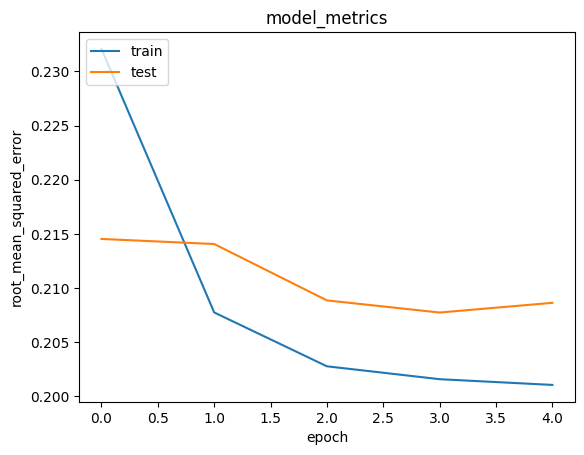

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan rekomendasi movie

In [ ]:
movie_df = fix_movies.copy()
df = pd.read_csv('ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
movie_not_watched
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)
user_movie_array

array([[  76,    0],
       [  76,  481],
       [  76,    1],
       ...,
       [  76, 3870],
       [  76, 2989],
       [  76, 7869]])

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for idx, row in enumerate(movie_df_rows.itertuples(index=False), start=1):
    print("{}. Title:".format(idx), row[1])
    print("   Genres:", row[2])
    print()

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for idx, row in enumerate(recommended_movie.itertuples(index=False), start=1):
    print("{}. Title:".format(idx), row[1])
    print("   Genres:", row[2])
    print()


302/302 [==============================] - 1s 1ms/step
Showing recommendations for users: 77
movie with high ratings from user
--------------------------------
1. Title: Star Wars: Episode IV - A New Hope (1977)
   Genres: Action|Adventure|Sci-Fi

2. Title: Star Wars: Episode V - The Empire Strikes Back (1980)
   Genres: Action|Adventure|Sci-Fi

3. Title: Harry Potter and the Chamber of Secrets (2002)
   Genres: Adventure|Fantasy

4. Title: Lord of the Rings: The Two Towers, The (2002)
   Genres: Adventure|Fantasy

5. Title: Spider-Man 2 (2004)
   Genres: Action|Adventure|Sci-Fi|IMAX

--------------------------------
Top 10 movie recommendation
--------------------------------
1. Title: Silence of the Lambs, The (1991)
   Genres: Crime|Horror|Thriller

2. Title: Fargo (1996)
   Genres: Comedy|Crime|Drama|Thriller

3. Title: Third Man, The (1949)
   Genres: Film-Noir|Mystery|Thriller

4. Title: Goodfellas (1990)
   Genres: Crime|Drama

5. Title: Godfather: Part II, The (1974)
   Genres: